In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.express as px
import pickle

import warnings
warnings.filterwarnings('ignore')

### Problem Statement

In [ ]:
 A_id: Unique identifier for each fruit
Size: Size of the fruit 
Weight: Weight of the fruit 
Sweetness: Degree of sweetness of the fruit 
Crunchiness: Texture indicating the crunchiness of the fruit Juiciness: Level of juiciness of the fruit 
Ripeness: Stage of ripeness of the fruit 
Acidity: Acidity level of the fruit 
Quality: Overall quality of the fruit

### Data Gathering

In [2]:
df=pd.read_csv("apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
df=df.drop('A_id',axis=1)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [5]:
df.isna().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
df.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

<Axes: ylabel='Size'>

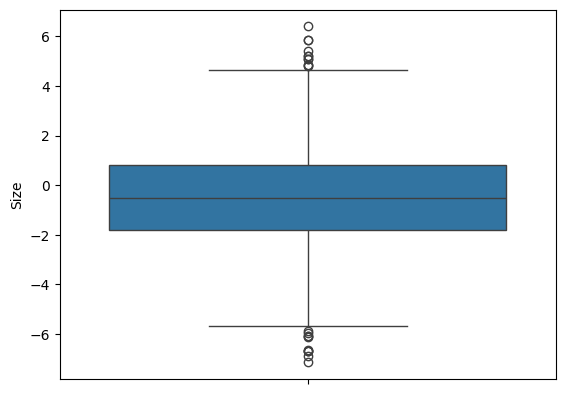

In [7]:
sns.boxplot(df['Size'])

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [9]:
df['Quality'].replace({'good':1 , 'bad' :0}, inplace=True)

In [10]:
df['Acidity'].replace({'Created_by_Nidula_Elgiriyewithana':0}, inplace=True)

In [11]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


### Feature Engineering

In [12]:
df['Size'].median()

-0.5137025125000001

In [13]:
df['Size'].fillna(df['Size'].median(), inplace=True)

In [14]:
df[ 'Weight'] .median()

-0.9847364865

In [15]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)

In [16]:
df['Sweetness'].median()

-0.5047584635

In [17]:
df['Sweetness'].fillna(df['Sweetness'].median(), inplace=True)

In [18]:
df ['Crunchiness' ].median ()

0.9982494390000001

In [19]:
df['Crunchiness'].fillna(df['Crunchiness'].median(), inplace=True)

In [20]:
df ['Juiciness' ].median()

0.5342186584999999

In [21]:
df['Juiciness'].fillna(df['Juiciness'].median(), inplace=True)

In [22]:
df['Ripeness'].median()

0.5034447135

In [23]:
df['Ripeness'].fillna(df['Ripeness'].median(), inplace=True)

In [24]:
df[ 'Quality'] .median()

1.0

In [25]:
df['Quality'].fillna(df['Quality'].median(), inplace=True)

In [26]:
df. isna () . sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [27]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [28]:
from scipy.stats import yeojohnson

In [29]:
array1=yeojohnson(df['Size'])[0]
array1

array([-3.96293174, -1.19427197, -0.29195438, ..., -4.00077844,
        0.27860312, -0.5134998 ])

In [30]:
df['Size']=array1
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.194272,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.291954,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.656875,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.365411,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.630856,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,-4.000778,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,0.278603,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [31]:
array2=yeojohnson(df['Weight'])[0]
array2


array([-2.53101771, -2.86212874, -1.35775088, ..., -1.78976628,
       -1.72529966, -0.98842303])

In [32]:
df['Weight']=array2
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.531018,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.194272,-2.862129,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.291954,-1.357751,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.656875,-2.287414,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.365411,-1.302628,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.630856,-2.152505,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,-4.000778,-1.789766,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,0.278603,-1.725300,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [33]:
array3=yeojohnson(df['Sweetness'])[0]
array3

array([ 5.13500741,  3.5470526 , -1.7734503 , ...,  2.30894538,
        0.12097795, -0.50851069])

In [34]:
df['Sweetness']=array3
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.531018,5.135007,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.194272,-2.862129,3.547053,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.291954,-1.357751,-1.773450,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.656875,-2.287414,1.303508,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.365411,-1.302628,-0.386904,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204683,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.630856,-2.152505,-2.502801,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,-4.000778,-1.789766,2.308945,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,0.278603,-1.725300,0.120978,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [35]:
array4=yeojohnson(df['Crunchiness'])[0]
array4

array([-1.00410127,  1.60593418, -0.34155199, ..., -0.19995036,
       -1.14408411,  1.00604149])

In [36]:
df['Crunchiness']=array4
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.531018,5.135007,-1.004101,1.844900,0.329840,-0.491590483,1.0
1,-1.194272,-2.862129,3.547053,1.605934,0.853286,0.867530,-0.722809367,1.0
2,-0.291954,-1.357751,-1.773450,-0.341552,2.838636,-0.038033,2.621636473,0.0
3,-0.656875,-2.287414,1.303508,-0.097781,3.637970,-3.413761,0.790723217,1.0
4,1.365411,-1.302628,-0.386904,-0.550384,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204683,-0.636756,0.024523,-1.087900,1.854235285,1.0
3997,-2.630856,-2.152505,-2.502801,0.660858,2.199709,4.763859,-1.334611391,0.0
3998,-4.000778,-1.789766,2.308945,-0.199950,2.161435,0.214488,-2.229719806,1.0
3999,0.278603,-1.725300,0.120978,-1.144084,1.266677,-0.776571,1.599796456,1.0


In [37]:
array5=yeojohnson(df['Juiciness'])[0]
array5

array([1.89348899, 0.86568061, 2.93914157, ..., 2.22510169, 1.2918862 ,
       0.53943542])

In [38]:
df['Juiciness']=array5
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.531018,5.135007,-1.004101,1.893489,0.329840,-0.491590483,1.0
1,-1.194272,-2.862129,3.547053,1.605934,0.865681,0.867530,-0.722809367,1.0
2,-0.291954,-1.357751,-1.773450,-0.341552,2.939142,-0.038033,2.621636473,0.0
3,-0.656875,-2.287414,1.303508,-0.097781,3.788819,-3.413761,0.790723217,1.0
4,1.365411,-1.302628,-0.386904,-0.550384,3.142857,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204683,-0.636756,0.024535,-1.087900,1.854235285,1.0
3997,-2.630856,-2.152505,-2.502801,0.660858,2.265297,4.763859,-1.334611391,0.0
3998,-4.000778,-1.789766,2.308945,-0.199950,2.225102,0.214488,-2.229719806,1.0
3999,0.278603,-1.725300,0.120978,-1.144084,1.291886,-0.776571,1.599796456,1.0


In [39]:
array6=yeojohnson(df['Ripeness'])[0]
array6

array([ 0.33013293,  0.86931103, -0.03802908, ...,  0.21461643,
       -0.77511918,  0.5040973 ])

In [40]:
df['Ripeness']=array6
array6

array([ 0.33013293,  0.86931103, -0.03802908, ...,  0.21461643,
       -0.77511918,  0.5040973 ])

In [41]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.531018,5.135007,-1.004101,1.893489,0.330133,-0.491590483,1.0
1,-1.194272,-2.862129,3.547053,1.605934,0.865681,0.869311,-0.722809367,1.0
2,-0.291954,-1.357751,-1.773450,-0.341552,2.939142,-0.038029,2.621636473,0.0
3,-0.656875,-2.287414,1.303508,-0.097781,3.788819,-3.395144,0.790723217,1.0
4,1.365411,-1.302628,-0.386904,-0.550384,3.142857,-1.300174,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204683,-0.636756,0.024535,-1.085232,1.854235285,1.0
3997,-2.630856,-2.152505,-2.502801,0.660858,2.265297,4.795707,-1.334611391,0.0
3998,-4.000778,-1.789766,2.308945,-0.199950,2.225102,0.214616,-2.229719806,1.0
3999,0.278603,-1.725300,0.120978,-1.144084,1.291886,-0.775119,1.599796456,1.0


### Feature Selection

In [42]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.962932,-2.531018,5.135007,-1.004101,1.893489,0.330133,-0.491590483,1.0
1,-1.194272,-2.862129,3.547053,1.605934,0.865681,0.869311,-0.722809367,1.0
2,-0.291954,-1.357751,-1.773450,-0.341552,2.939142,-0.038029,2.621636473,0.0
3,-0.656875,-2.287414,1.303508,-0.097781,3.788819,-3.395144,0.790723217,1.0
4,1.365411,-1.302628,-0.386904,-0.550384,3.142857,-1.300174,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204683,-0.636756,0.024535,-1.085232,1.854235285,1.0
3997,-2.630856,-2.152505,-2.502801,0.660858,2.265297,4.795707,-1.334611391,0.0
3998,-4.000778,-1.789766,2.308945,-0.199950,2.225102,0.214616,-2.229719806,1.0
3999,0.278603,-1.725300,0.120978,-1.144084,1.291886,-0.775119,1.599796456,1.0


### Model Training

In [43]:
x= df.drop('Quality',axis=1)
y=df['Quality']
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.962932,-2.531018,5.135007,-1.004101,1.893489,0.330133,-0.491590483
1,-1.194272,-2.862129,3.547053,1.605934,0.865681,0.869311,-0.722809367
2,-0.291954,-1.357751,-1.773450,-0.341552,2.939142,-0.038029,2.621636473
3,-0.656875,-2.287414,1.303508,-0.097781,3.788819,-3.395144,0.790723217
4,1.365411,-1.302628,-0.386904,-0.550384,3.142857,-1.300174,0.501984036
...,...,...,...,...,...,...,...
3996,-0.293048,1.937157,-0.204683,-0.636756,0.024535,-1.085232,1.854235285
3997,-2.630856,-2.152505,-2.502801,0.660858,2.265297,4.795707,-1.334611391
3998,-4.000778,-1.789766,2.308945,-0.199950,2.225102,0.214616,-2.229719806
3999,0.278603,-1.725300,0.120978,-1.144084,1.291886,-0.775119,1.599796456


In [44]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3996    1.0
3997    0.0
3998    1.0
3999    1.0
4000    1.0
Name: Quality, Length: 4001, dtype: float64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [46]:
knn_clf = KNeighborsClassifier(n_neighbors=3,p=2)
knn_clf.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [47]:
# Training Data Evaluation 
y_pred_train = knn_clf.predict(x_train) 
cnf_matrix = confusion_matrix(y_train, y_pred_train) 
print("Confusion Matrix :\n",cnf_matrix) 
print("*"*50) 
accuracy= accuracy_score(y_train, y_pred_train) 
print("Accuracy :", accuracy) 
print("*"*50) 
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report) 

Confusion Matrix :
 [[1473   99]
 [  85 1543]]
**************************************************
Accuracy : 0.9425
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1572
         1.0       0.94      0.95      0.94      1628

    accuracy                           0.94      3200
   macro avg       0.94      0.94      0.94      3200
weighted avg       0.94      0.94      0.94      3200



In [48]:
# Testing Data Evaluation 

y_pred = knn_clf.predict(x_test) 
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50) 
accuracy= accuracy_score(y_test, y_pred) 
print("Accuracy :", accuracy) 
print("*"*50) 
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report) 

Confusion Matrix :
 [[368  56]
 [ 38 339]]
**************************************************
Accuracy : 0.8826466916354557
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       424
         1.0       0.86      0.90      0.88       377

    accuracy                           0.88       801
   macro avg       0.88      0.88      0.88       801
weighted avg       0.88      0.88      0.88       801



### Best Value

Text(0, 0.5, 'Accuracy')

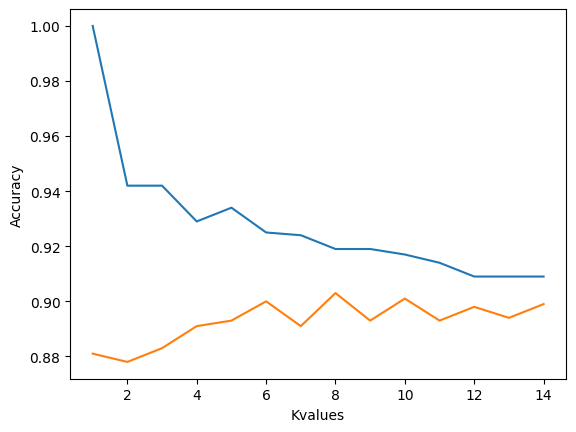

In [49]:
k_values = np.arange(1,15)
train_acc_list = [] 
test_acc_list = [] 
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2) 
    knn_clf.fit(x_train, y_train) 
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3)) 
    
plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list) 

plt.xlabel("Kvalues") 
plt.ylabel("Accuracy")

### Normalization

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [51]:
normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x)
df_x = pd.DataFrame(array1, columns= x.columns)
df_x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.233934,0.363723,0.927664,0.356302,0.560079,0.468857,0.452225
1,0.438182,0.338192,0.808458,0.546181,0.483789,0.509955,0.436185
2,0.504747,0.454194,0.409054,0.404502,0.637693,0.440795,0.668192
3,0.477826,0.382508,0.640037,0.422236,0.700761,0.184906,0.541180
4,0.627013,0.458444,0.513140,0.389310,0.652814,0.344591,0.521150
...,...,...,...,...,...,...,...
3996,0.504666,0.708262,0.526819,0.383026,0.421355,0.360974,0.614957
3997,0.332203,0.392910,0.354302,0.477427,0.587677,0.809236,0.393744
3998,0.231142,0.420881,0.715514,0.414804,0.584693,0.460052,0.331650
3999,0.546838,0.425852,0.551266,0.346118,0.515425,0.384612,0.597306


In [52]:
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [53]:
knn_clf = KNeighborsClassifier(n_neighbors=9,p=1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

### Model Evaluation

In [54]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1439  157]
 [ 129 1475]]
**************************************************
Accuracy : 0.910625
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1596
         1.0       0.90      0.92      0.91      1604

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200



In [55]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[359  41]
 [ 41 360]]
**************************************************
Accuracy : 0.8976279650436954
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       400
         1.0       0.90      0.90      0.90       401

    accuracy                           0.90       801
   macro avg       0.90      0.90      0.90       801
weighted avg       0.90      0.90      0.90       801



### Best k_value

Text(0, 0.5, 'Accuracy')

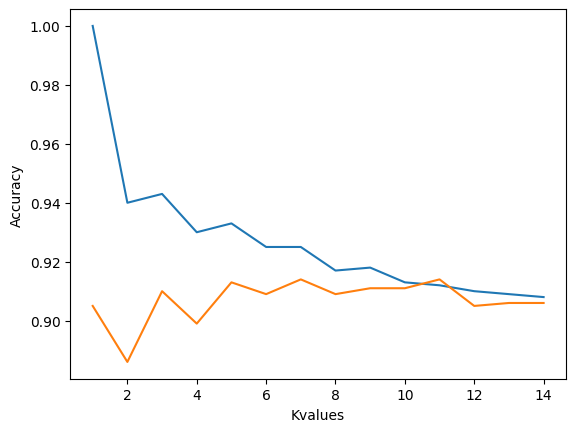

In [56]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2) # Euclidean Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

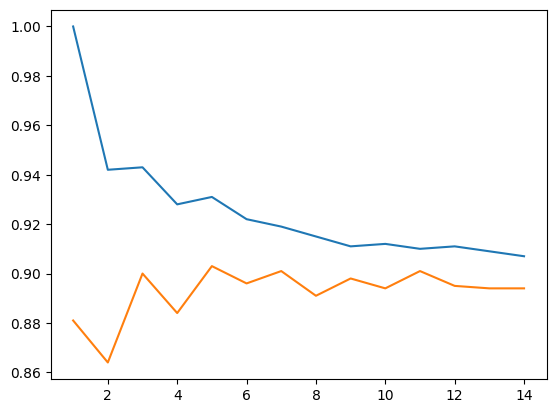

In [57]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1) # manhattan Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

In [ ]:
By compairing two graphs on manhatten and euclidean distance formula ,
on euclidean distance we get more accuracy on k=9

In [59]:
normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x)
df_x = pd.DataFrame(array1, columns= x.columns)
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)
knn_clf = KNeighborsClassifier(n_neighbors=9,p=2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [60]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1449  147]
 [ 117 1487]]
**************************************************
Accuracy : 0.9175
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1596
         1.0       0.91      0.93      0.92      1604

    accuracy                           0.92      3200
   macro avg       0.92      0.92      0.92      3200
weighted avg       0.92      0.92      0.92      3200



In [61]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[357  43]
 [ 28 373]]
**************************************************
Accuracy : 0.9113607990012484
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       400
         1.0       0.90      0.93      0.91       401

    accuracy                           0.91       801
   macro avg       0.91      0.91      0.91       801
weighted avg       0.91      0.91      0.91       801



### Standardization

In [62]:
std_scaler = StandardScaler()
array1 = std_scaler.fit_transform(x)
df_x = pd.DataFrame(array1, columns= x.columns)

### Model Training

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [64]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Model Evaluation

In [65]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1542   54]
 [ 166 1438]]
**************************************************
Accuracy : 0.93125
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1596
         1.0       0.96      0.90      0.93      1604

    accuracy                           0.93      3200
   macro avg       0.93      0.93      0.93      3200
weighted avg       0.93      0.93      0.93      3200



In [66]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[371  29]
 [ 55 346]]
**************************************************
Accuracy : 0.8951310861423221
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       400
         1.0       0.92      0.86      0.89       401

    accuracy                           0.90       801
   macro avg       0.90      0.90      0.90       801
weighted avg       0.90      0.90      0.90       801



### Best k_Value

Text(0, 0.5, 'Accuracy')

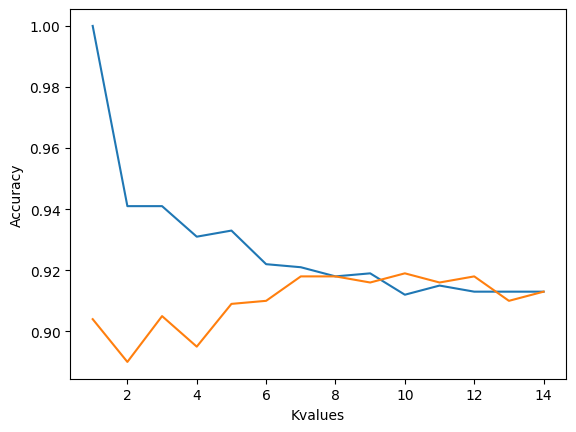

In [67]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2) # Euclidean Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

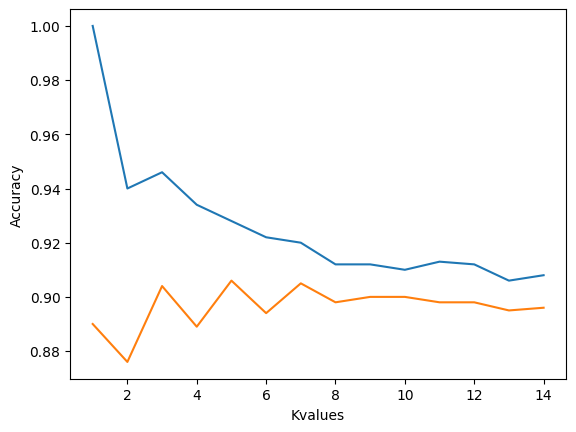

In [68]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1) # manhattan Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

In [ ]:
from this diagram we got high accuracy at k=9 p=1

In [69]:
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [70]:
knn_clf = KNeighborsClassifier(n_neighbors=9,p=1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [71]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1441  155]
 [ 126 1478]]
**************************************************
Accuracy : 0.9121875
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1596
         1.0       0.91      0.92      0.91      1604

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200



In [72]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[356  44]
 [ 36 365]]
**************************************************
Accuracy : 0.9001248439450686
**************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       400
         1.0       0.89      0.91      0.90       401

    accuracy                           0.90       801
   macro avg       0.90      0.90      0.90       801
weighted avg       0.90      0.90      0.90       801



In [73]:
import numpy as np
import pickle
import warnings
import json
warnings.filterwarnings('ignore')

In [74]:
with open("KNN.pkl", 'wb') as f:
    pickle.dump(knn_clf,f)

### Load Model

In [75]:
with open("KNN.pkl", 'rb') as f:
    model = pickle.load(f)

In [76]:
column_data = {
                "Quality" : {'good':1 , 'bad' :0}
            
            
                }
with open("column_data.json", 'w') as f:
    json.dump(column_data,f)